In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("hongkong_restaurants.csv")
df

,Alias,Name,Rating,Review_Counts,Category1,Category2,Category3,Category4,Category5,Category6,Latitude,Longitude,Price
0,口利福-香港,Ho Lee Fook,4.5,136,asianfusion,Asian Fusion,cantonese,Cantonese,NaN,NaN,22.282910,114.152450,$$$
1,漁屋日本料理-香港-2,Isari Kiya Japanese Dining,5.0,6,japanese,Japanese,buffets,Buffets,sushi,Sushi Bars,22.367844,114.114687,$$
2,唐宮小聚-香港-3,Social Place,5.0,1,dimsum,Dim Sum,asianfusion,Asian Fusion,NaN,NaN,22.370249,114.113957,NaN
3,澳門九記清湯腩王-香港,Supreme Beef Brisket Soup,4.5,10,noodles,Noodles,soup,Soup,hkcafe,Hong Kong Style Cafe,22.313216,114.170053,$
4,金華冰廳-kowloon,Kam Wah Cafe,4.5,231,hkcafe,Hong Kong Style Cafe,bakeries,Bakeries,NaN,NaN,22.322313,114.169779,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,kowloon-east-kitchen-香港,Kowloon East Kitchen,4.5,4,cafes,Cafes,italian,Italian,french,French,22.311960,114.223671,NaN
996,華南粉麵茶餐廳-香港,Wah Nam Noodle Restaurant,4.0,6,hkcafe,Hong Kong Style Cafe,noodles,Noodles,NaN,NaN,22.277220,114.170805,NaN
997,the-social-house-香港,The Social House,4.5,2,diners,Diners,asianfusion,Asian Fusion,NaN,NaN,22.278240,114.191870,NaN
998,南京金陵湯包-香港-2,Nanjing Jinling Dumpling,4.5,3,shanghainese,Shanghainese,dimsum,Dim Sum,NaN,NaN,22.306200,114.170750,NaN


In [3]:
df["Alias"] = df["Alias"].str.replace('-香港?.+','')
df  

<ipython-input-3-8251cb7bb67c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Alias"] = df["Alias"].str.replace('-香港?.+','')


,Alias,Name,Rating,Review_Counts,Category1,Category2,Category3,Category4,Category5,Category6,Latitude,Longitude,Price
0,口利福,Ho Lee Fook,4.5,136,asianfusion,Asian Fusion,cantonese,Cantonese,NaN,NaN,22.282910,114.152450,$$$
1,漁屋日本料理,Isari Kiya Japanese Dining,5.0,6,japanese,Japanese,buffets,Buffets,sushi,Sushi Bars,22.367844,114.114687,$$
2,唐宮小聚,Social Place,5.0,1,dimsum,Dim Sum,asianfusion,Asian Fusion,NaN,NaN,22.370249,114.113957,NaN
3,澳門九記清湯腩王,Supreme Beef Brisket Soup,4.5,10,noodles,Noodles,soup,Soup,hkcafe,Hong Kong Style Cafe,22.313216,114.170053,$
4,金華冰廳-kowloon,Kam Wah Cafe,4.5,231,hkcafe,Hong Kong Style Cafe,bakeries,Bakeries,NaN,NaN,22.322313,114.169779,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,kowloon-east-kitchen,Kowloon East Kitchen,4.5,4,cafes,Cafes,italian,Italian,french,French,22.311960,114.223671,NaN
996,華南粉麵茶餐廳,Wah Nam Noodle Restaurant,4.0,6,hkcafe,Hong Kong Style Cafe,noodles,Noodles,NaN,NaN,22.277220,114.170805,NaN
997,the-social-house,The Social House,4.5,2,diners,Diners,asianfusion,Asian Fusion,NaN,NaN,22.278240,114.191870,NaN
998,南京金陵湯包,Nanjing Jinling Dumpling,4.5,3,shanghainese,Shanghainese,dimsum,Dim Sum,NaN,NaN,22.306200,114.170750,NaN


In [4]:
#pre processing for wordcloud

In [5]:
#subsetting category columns
cuisine_categ = df.iloc[:,4:10]


#apply function to map all strings to lowercase
cuisine = cuisine_categ.applymap(lambda s: s.lower() if type(s) == str else s)


#change dataframe into list (technically a list of list)
df_to_list=cuisine.values.tolist()


#flattening the list into one big list
the_list = []
for sublist in df_to_list:
    for item in sublist:
        the_list.append(item)

        
#removing nan values from list
no_nan_list = [x for x in the_list if str(x) != 'nan']
#remove all white spaces from list

final_list = [x.replace(" ","") for x in no_nan_list]

In [6]:
type(final_list)

list

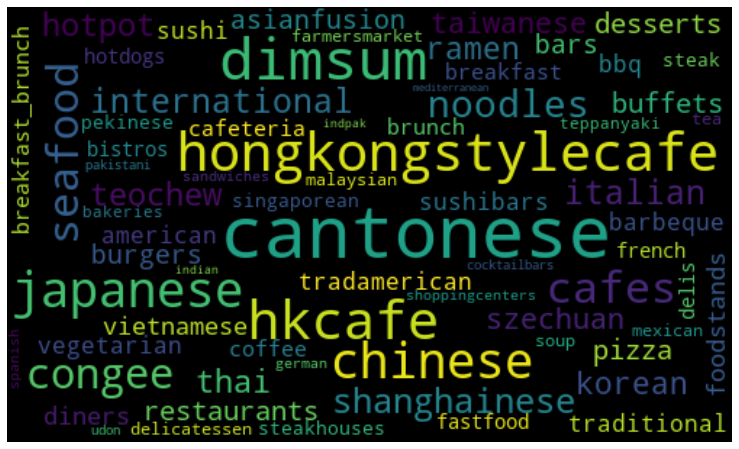

In [7]:
#list to string
tostr=(" ").join(final_list)

#word cloud

wc = WordCloud(width = 500, height = 300,max_words=70,collocations=False,max_font_size=50).generate(tostr)
plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()


In [8]:
#sort restaurants by main category
df.groupby("Category1")["Alias"].count().sort_values(ascending=False)

Category1
cantonese         137
hkcafe            119
chinese            62
japanese           60
dimsum             45
                 ... 
mideastern          1
nightlife           1
organic_stores      1
portuguese          1
wine_bars           1
Name: Alias, Length: 89, dtype: int64

In [9]:
restaurant_data = df[['Alias','Name','Rating','Review_Counts','Category1','Latitude','Longitude','Price']]

In [35]:
restaurant_data.to_csv("restaurant_cleaned_data.csv",index=False)

In [11]:
#top 5 hkcafe by rating and reviews

In [12]:
top_hkcafe = restaurant_data[restaurant_data['Category1'] == 'hkcafe'].copy()
top_hkcafe = top_hkcafe.sort_values(by=['Review_Counts','Rating'],ascending=False)
top5_hkcafe = top_hkcafe[:5]
top5_hkcafe

,Alias,Name,Rating,Review_Counts,Category1,Latitude,Longitude,Price
116,澳洲牛奶公司,Australia Dairy Company,4.0,405,hkcafe,22.304600,114.170501,$
4,金華冰廳-kowloon,Kam Wah Cafe,4.5,231,hkcafe,22.322313,114.169779,$
440,華星冰室,Capital Cafe,4.0,47,hkcafe,22.277547,114.177322,$
163,金鳳茶餐廳,Kam Fung Restaurant,4.0,39,hkcafe,22.275460,114.172583,$
779,翠華餐廳,Tsui Wah Restaurant,3.5,39,hkcafe,22.281802,114.155614,$$


In [13]:
#top 5 cantonese by rating and reviews

In [14]:
top_cantonese = restaurant_data[restaurant_data['Category1']=='cantonese'].copy()
top_cantonese = top_cantonese.sort_values(['Review_Counts','Rating'],ascending=False)
top5_cantonese = top_cantonese[:5]
top5_cantonese

,Alias,Name,Rating,Review_Counts,Category1,Latitude,Longitude,Price
22,添好運點心專門店,Tim Ho Wan,4.0,441,cantonese,22.284578,114.158153,$$
48,添好運,Tim Ho Wan,4.0,225,cantonese,22.329047,114.166336,$
152,一樂燒鵝,Yat Lok Restaurant,4.0,198,cantonese,22.282556,114.155308,$$
156,九記牛腩,Kau Kee Restaurant,4.0,185,cantonese,22.284257,114.152543,$
134,甘牌燒鵝,Kam's Roast Goose,4.0,133,cantonese,22.277740,114.175310,$$


In [15]:
#top 5 japanese by rating and reviews

In [16]:
top_japanese = restaurant_data[restaurant_data['Category1']=='japanese'].copy()
top_japanese = top_japanese.sort_values(['Review_Counts','Rating'],ascending=False)
top5_japanese = top_japanese[:5].copy()
top5_japanese

,Alias,Name,Rating,Review_Counts,Category1,Latitude,Longitude,Price
356,ozone-kowloon,OZONE,3.5,129,japanese,22.303541,114.160223,$$$
105,yardbird,Yardbird,4.0,85,japanese,22.287249,114.149080,$$$
448,大喜屋日本料理,Daikiya Japanese Restaurant,4.5,47,japanese,22.298451,114.172414,$$
470,nobu-intercontinental-hong-kong,Nobu Intercontinental Hong Kong,4.0,26,japanese,22.293392,114.173940,$$$
139,爆丼屋,Big Bang Don,4.0,12,japanese,22.316720,114.171360,$$


In [17]:
#top 5 dimsum by rating and reviews

In [18]:
top_dimsum = restaurant_data[restaurant_data['Category1']=='dimsum'].copy()
top_dimsum = top_dimsum.sort_values(['Review_Counts','Rating'],ascending=False)
top5_dimsum = top_dimsum[:5].copy()
top5_dimsum

,Alias,Name,Rating,Review_Counts,Category1,Latitude,Longitude,Price
324,添好運,Tim Ho Wan,4.0,181,dimsum,22.317138,114.162827,$$
870,卅二公館,Mott 32,4.0,82,dimsum,22.280527,114.159093,$$$
177,聚點坊,Dim Sum Square,4.0,77,dimsum,22.285072,114.151296,$
235,點點心,Dim Dim Sum,4.5,53,dimsum,22.307093,114.165957,$
179,飲茶,Yum Cha,4.0,24,dimsum,22.318962,114.168627,NaN


In [19]:
#top 5 seafood by rating and reviews

In [20]:
top_seafood = restaurant_data[restaurant_data['Category1']=='seafood'].copy()
top_seafood = top_seafood.sort_values(['Review_Counts','Rating'],ascending=False)
top5_seafood = top_seafood[:5].copy()
top5_seafood

,Alias,Name,Rating,Review_Counts,Category1,Latitude,Longitude,Price
35,龍蝦吧,Lobster Bar,5.0,11,seafood,22.277039,114.164446,$$$
384,fish-和-chick,Fish & Chick,4.0,10,seafood,22.283845,114.127572,$$
738,verandah,Verandah,5.0,8,seafood,22.295263,114.171774,NaN
255,海港燒鵝海鮮酒家,Victoria Harbour Roasted Goose Seafood Restaurant,4.0,5,seafood,22.425671,114.233833,NaN
111,三小姐海鮮小菜,三小姐海鮮小菜,4.5,4,seafood,22.446630,114.166410,$$


In [21]:
#top 5 cafe by rating and reviews

In [22]:
top_cafe = restaurant_data[restaurant_data['Category1']=='cafes'].copy()
top_cafe = top_cafe.sort_values(['Review_Counts','Rating'],ascending=False)
top5_cafe = top_cafe[:5].copy()
top5_cafe

,Alias,Name,Rating,Review_Counts,Category1,Latitude,Longitude,Price
636,corner-kitchen-cafe,Corner Kitchen Cafe,3.5,24,cafes,22.285700,114.147480,$$
23,牧羊少年咖啡-茶-酒館,The Alchemist Cafe Bistro,4.0,20,cafes,22.327927,114.167599,$$
190,café-sausalito,Café Sausalito,5.0,9,cafes,22.327480,114.162750,$$
290,伙食工業,Fooody,4.0,7,cafes,22.399240,114.192703,$$
860,cafe-8,Cafe 8,4.0,7,cafes,22.286933,114.162111,$$


In [23]:
#top 5 chinese restaurants by rating and reviews

In [24]:
top_chinese = restaurant_data[restaurant_data['Category1']=='chinese'].copy()
top_chinese = top_chinese.sort_values(['Review_Counts','Rating'],ascending=False)
top5_chinese = top_chinese[:5].copy()
top5_chinese

,Alias,Name,Rating,Review_Counts,Category1,Latitude,Longitude,Price
547,大都烤鴨,Empire City Roasted Duck,4.0,32,chinese,22.297457,114.173642,$$
431,大班樓,The Chairman,4.5,30,chinese,22.284566,114.152637,$$$
18,坤記煲仔小菜,Kwan Kee Claypot Rice,4.0,29,chinese,22.287090,114.143027,$$
756,滿貫廳,Moon Koon Restaurant,4.5,13,chinese,22.274120,114.179963,NaN
810,太平館餐廳,Tai Ping Koon Restaurant,4.0,13,chinese,22.300037,114.174589,$$


In [25]:
#rbinding to make a new dataframe
mapping_data = pd.concat([top5_cafe,top5_cantonese,top5_chinese,top5_dimsum,top5_hkcafe,top5_japanese,top5_seafood])

In [26]:
mapping_data.shape

(35, 8)

In [ ]:
#saving each dataframe.

In [27]:
mapping_data.to_csv("mapping_data.csv",index=False)

In [28]:
top5_chinese.to_csv("top5_chinese.csv",index=False)

In [29]:
top5_cafe.to_csv("top5_cafe.csv",index=False)

In [30]:
top5_cantonese.to_csv("top5_cantonese.csv",index=False)

In [31]:
top5_dimsum.to_csv("top5_dimsum.csv",index=False)

In [32]:
top5_hkcafe.to_csv("top5_hkcafe.csv",index=False)

In [33]:
top5_japanese.to_csv("top5_japanese.csv",index=False)

In [34]:
top5_seafood.to_csv("top5_seafood.csv",index=False)